# Equation Fitting with Different Error Minimization Engines
## Andrew Garcia, 2019

This Python notebook is divided into two sections. The first one will briefly execute the fitting of an equation using a simple minimization function, while the second second will show the power of equation fitting using a **global** minimization function, which may sometimes be necessary for equations which have more than a handful of undetermined coefficients. 

scripts shown:
* minfit.py
* basinhopfit.py

## Simple minimization (python optimize.minimize)

The script for this example is **minfit.py**. The first thing we do is load our experimental data for the fit:

In [4]:
'''LOAD EXPERIMENTAL DATA'''
import xlwings as xw

'CHANGE TO PATH OF EXCEL FILE WITH DATA'
path = r'C:\Users\garci\Dropbox (Personal)\scripts\statistics\minfit_template.xlsx'
book = xw.Book(path)

sheet='Sheet1'

from pdsfit import lastRow

x=book.sheets[sheet].range('A2:A'+str(lastRow(sheet,book))).value
exps=book.sheets[sheet].range('B2:B'+str(lastRow(sheet,book))).value
print('experimental data \nx\n{}\ny\n{}'.format(x,exps))

experimental data 
x
[-50.0, -40.90909091, -31.818181820000003, -22.727272730000003, -13.636363640000003, -4.545454550000002, 4.545454539999998, 13.636363629999998, 22.72727272, 31.81818181, 40.909090899999995, 49.99999998999999]
y
[162.0, 120.0, 100.0, 70.0, 80.0, 30.0, 50.0, 20.0, 60.0, 90.0, 130.0, 170.0]


The next two code blocks that follow are the equation eqn() with the parameters to be fitted and the error minimization function to be minimized E() also known as the objective function. eqn() should be changed to the equation which you want to fit your data:

In [5]:
def eqn(x,pars):
    
    C1,C2 = pars
    
    return C1*x**2 + C2

def E(pars):
    
    C1,C2= pars
    
    
    SUM = 0
    i=0
    while i < len(x):        
        SUM += ( eqn(x[i],pars)- exps[i] )**2 
#        SUM += (  ( eqn(x[i],pars)- exps[i] ) / exps[i]  )**2 

        i+=1
        
    return SUM

The next code block is the engine used to minimize E(), which is Python's optimize.minimize. It also plots the data:

In [ ]:
def make():
        
    initial_guess = [-1, -1]
    result = optimize.minimize(E, initial_guess)
    
    print(result.x)
    x_theory=np.linspace(min(x),max(x),100)
    
    fit = eqn(x_theory,result.x)
    
    plt.figure()
    
    plt.plot(x,exps,'o',label='data')
    plt.text(0,1,'$s$')
    plt.plot(x_theory,fit,label='fit')
    plt.legend()

The way I've written these scripts, execution is as easy as writing make()

[ 0.050739   40.19642886]


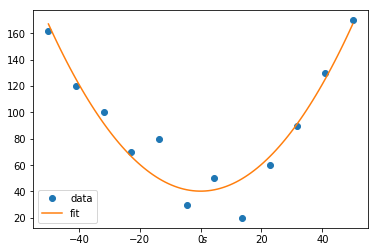

In [12]:
from minfit import *
make()

## Global minimization (python optimize.basinhopping)

This walkthrough shows the implementation of the basinhopping minimization algorithm to an example which aims to find 7 coefficients of a 2-D Bessel function **basinhopfit.py**. As I've already run through the basic workings of the error minimization algorithm with the objective function, I will only execute the code and compare it with different amounts of data.

First thing we do is we load our experimental data x's and y values. I have 'made' experimental data by randomly selecting points for the two variables x_1 and x_2 and compute them with *known* coefficients to generate the y experimental data. The known coefficients were also chosen arbitrarily, though their values will help us validate the fit; if the fitted values approach those of these coefficients, the fit works well. 

The template can be found in the statistics repository as basinhop_TEMPLATE.xlsx. 

*I encourage you to load by editing your directory on the script and not the terminal, as this makes it less messy

In [1]:
import xlwings as xw
from basinhopfit import lastRow

path = r'C:\Users\garci\Dropbox (Personal)\scripts\statistics\basinhop_TEMPLATE.xlsx'
book = xw.Book(path)

sheet='Sheet1'
x1=book.sheets[sheet].range('A2:A'+str(lastRow(sheet,book))).value
x2=book.sheets[sheet].range('B2:B'+str(lastRow(sheet,book))).value
y_exps=book.sheets[sheet].range('C2:C'+str(lastRow(sheet,book))).value
print('experimental data:\ny\n{}\nx1\n{}\nx2\n{}'.format(y_exps,x1,x2))
print('number of experiments ',len(x1))

sheet='datagen'
kcoeffs = book.sheets[sheet].range('G2:G8').value
print('\n\nknown coefficients\n',kcoeffs)

experimental data:
y
[1.5420983334460192, 1.322517601589812, 2.8800050453741237, 0.7070118569651526, 2.6297158782831067, -1.9500865454495924, 3.361357804871006, 2.2944251474891573, 2.234681196172063, 3.0264349658365575, 1.8736986124182584, -1.6344396691666914, 0.011562554271287162, 3.103083892441026]
x1
[0.09306632195825111, -0.26486491520959166, -0.23408672044747383, 0.1757720551500661, 0.08075438690732997, 0.024784521957015, 0.33763941560074645, 0.1893220072238694, -0.5201231046551272, -0.16803078966217075, 0.3546412829724228, -0.2145817375506121, 0.8991176227186377, 0.27191783806172504]
x2
[-0.3586287449160476, -0.36644726669400135, 0.18941665999286872, -0.9587716531070688, -0.24792717197939462, -0.5758362141136594, -0.06708774700848362, -0.28692329403196765, 0.3133613646742223, 0.013945444798898391, 0.33183476538310097, 0.5779268382801096, 0.8325501099509018, 0.11909433434099065]
number of experiments  14


known coefficients
 [1.0, 4.0, 4.0, 10.0, 2.0, 10.0, 3.0]


This dataset has an equivalent of 14 experiments. The 'datagen' sheet shows how the data was generated and the values of the known coefficients. I've printed these values to validate the algorithm.

Then we run the script. *niter* defines the number of basin hop iterations for the global minimization. We'll see how this parameter affects our estimates. Let's start with 1 iteration for this set of 14 experiments.


 global minimization results 
 fitted coefficients:
 [ 2.13013715  3.89127096  2.65789713 10.44202617  2.94561934  5.33868494
  2.35767112]


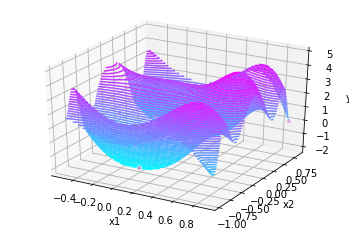

In [7]:
from basinhopfit import * 

make(niter=1)

As we can see, these fitted coefficients do not agree with the known coefficients printed above. For our dataset of 14 experiments, 1 iteration is not enough to make a good estimate on the model. 
Let's try 200 iterations


 global minimization results 
 fitted coefficients:
 [ 0.99999972  4.00000008  3.99999856 10.00000008  1.99999973  9.99999785
  3.00000033]


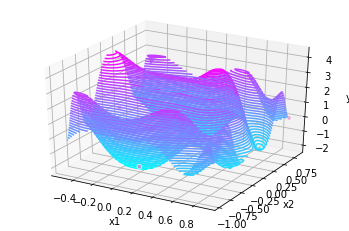

In [10]:
from basinhopfit import * 

make(200)

The fitted coefficients are now much closer to the real values. 200 iterations thus give us significantly more accurate estimates, though the computational time is not as instantaneous a niter=1. Nonetheless, it's only a minute difference versus a couple of seconds

Just for fun let's try a dataset of 224 experiments with niter=1. For this let's load the data from the 'datagen' sheet:

In [12]:
sheet='datagen'
x1=book.sheets[sheet].range('A2:A'+str(lastRow(sheet,book))).value
x2=book.sheets[sheet].range('B2:B'+str(lastRow(sheet,book))).value
y_exps=book.sheets[sheet].range('C2:C'+str(lastRow(sheet,book))).value
#print('experimental data:\ny\n{}\nx1\n{}\nx2\n{}'.format(y_exps,x1,x2))
print('number of experiments ',len(x1))

kcoeffs = book.sheets[sheet].range('G2:G8').value
print('\n\nknown coefficients\n',kcoeffs)

number of experiments  224


known coefficients
 [1.0, 4.0, 4.0, 10.0, 2.0, 10.0, 3.0]



 global minimization results 
 fitted coefficients:
 [ 0.99999999  3.99999997  3.99999998 10.00000001  1.99999995 10.
  2.99999999]


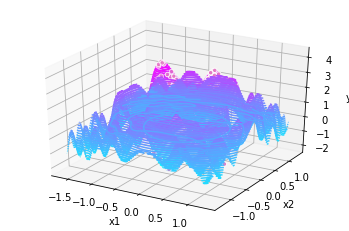

In [2]:
from basinhopfit import * 

make(1)

It is no surprise than having a vast amount of data to correlate would give us the most accurate fit, no matter how fewer the iterations are. This coefficient-weighted Bessel function is incredibly difficult to fit with a few points as one can notice by all the valleys it has and was just used to showcase the script. I hope you enjoyed this walkthrough.

-Andy <3